#### Libraries

In [29]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import fsolve

### $1^{st}$ method - graphically

In [3]:
Q = np.array([[26.48,  7.17, 9.55], 
              [ 7.17, 11.09, 3.78],
              [ 9.55,  3.78, 9.13]])

Q_vect = np.array([Q[0,0], Q[1,1], Q[2,2], Q[1,2], Q[0,2], Q[0,1]])

In [46]:
def Q_xs(theta, Q):
    
    """ Function returning complex non-
    linear equation provided angle theta,
    and Voigt-vector Q.
    
    Q_xs = 0 (i.e. ==0 in another framework).
    """
    
    s = np.sin(theta)
    c = np.cos(theta)
    
    vect = np.array([-s*c**3, c**4-3*(s*c)**2, s*c**3-s**3*c, 2*(s*c**3-s**3*c), 3*(s*c)**2-s**4, s**3*c])

    Q_xs =  np.dot(vect, Q)
    
    return Q_xs

def Q_ys(theta, Q):
    
    """ Function returning complex non-
    linear equation provided angle theta,
    and Voigt-vector Q.
    
    Q_ys = 0 (i.e. ==0 in another framework).
    """

    s = np.sin(theta)
    c = np.cos(theta)
    
    vect = [-c*s**3, -s**4+3*(s*c)**2, -s*c**3+s**3*c, 2*(-s*c**3+s**3*c), -3*(s*c)**2+c**4, c**3*s]

    Q_ys = np.dot(vect, Q)
    
    return Q_ys

Q_xs : pi/5.7 rad
Q_ys : pi/5.4 rad
Q_ys : pi/5.2 rad
Q_ys : pi/1.5 rad
Q_xs : pi/1.5 rad


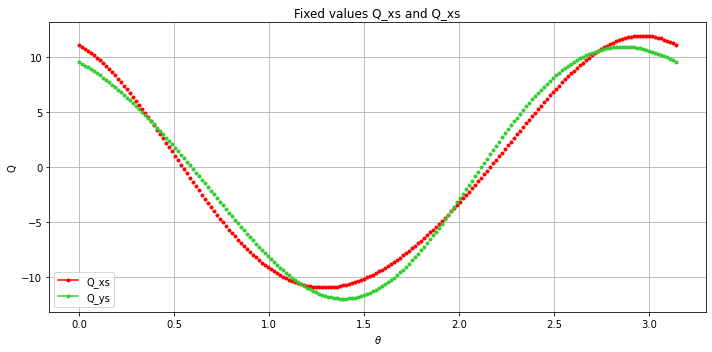

In [82]:
theta_vect = np.linspace(0, np.pi, 200)
eps = 2.E-1 #threshold to get zero value

plt.figure(figsize=(10,5))

for theta in theta_vect:
    Qxs = Q_xs(theta, Q_vect)
    Qys = Q_ys(theta, Q_vect)
    
    curve1, = plt.plot(theta, Qxs, 'r.-')
    curve2, = plt.plot(theta, Qys, '.-', color='limegreen')

    if np.abs(Qxs) < eps:
        print('Q_xs : pi/{:.1f} rad'.format(np.pi/theta))
    if np.abs(Qys) < eps:
        print('Q_ys : pi/{:.1f} rad'.format(np.pi/theta))
    
curve1.set_label('Q_xs')
curve2.set_label('Q_ys')

plt.title('Fixed values Q_xs and Q_xs')
plt.ylabel('Q')
plt.xlabel(r'$\theta$')

plt.grid(True)
plt.legend()

plt.tight_layout()

We get two angles for which Q_xs and Q_ys are almost zero in the same time (one more than the other).

Once in radiants :

### $2^{nde}$ method - Verchery polar parameters

In [84]:
def solve_system(Q):
    
    """ Function returning Verchery polar 
    invariants, given Q stiffness matrix.
    """
    
    M = np.array([[1, -2,  4,  1,  0,   0],
                  [1,  2,  0,  1,  0,   0],
                  [1, -2, -4,  1, 4j, -4j],
                  [1,  0,  0, -1, 2j,  2j]])
    
    lhs_vect = np.dot(M, Q)
    
    return lhs_vect

In [205]:
Q_vect = np.array([[Q[0,0], Q[0,1], Q[2,2], Q[1,1], Q[0,2], Q[1,2]]])

lhs_vect = solve_system(Q_vect.T)
lhs_vect

array([[ 59.75 +0.j  ],
       [ 51.91 +0.j  ],
       [-13.29+23.08j],
       [ 15.39+26.66j]])

#### post process

In [209]:
T0 = np.real(lhs_vect[0]) / 8
T1 = np.real(lhs_vect[1]) / 8
R0 = np.abs (lhs_vect[2]) / 8
R1 = np.abs (lhs_vect[3]) / 8

print(T0, T1, R0, R1)

# -------------
# phi_0 & phi_1
# -------------

tan_theta = np.mod(np.imag(lhs_vect[2:]) / np.real(lhs_vect[2:]), np.pi/2)

phi_0 = np.arctan(tan_theta[0]) / 4
phi_1 = np.arctan(tan_theta[1]) / 2

[7.46875] [6.48875] [3.32911048] [3.84790467]


In [210]:
print(phi_0)
print(phi_1)

print('\n')

print(phi_0 - phi_1)

[0.23805369]
[0.08005746]


[0.15799623]


#### Q in orthotropic framework

In [231]:
theta = phi_1

M = np.array([[ 1,  2,  np.cos(4*(phi_0-theta)),  4*np.cos(2*(phi_1-theta))],
              [ 0,  0,  np.sin(4*(phi_0-theta)),  2*np.sin(2*(phi_1-theta))],
              [-1, -2, -np.cos(4*(phi_0-theta)),  0                        ],
              [ 1,  0, -np.cos(4*(phi_0-theta)),  0                        ],
              [ 0,  0, -np.sin(4*(phi_0-theta)),  2*np.sin(2*(phi_1-theta))],
              [ 1,  2,  np.cos(4*(phi_0-theta)), -4*np.cos(2*(phi_1-theta))]])

rhs_vect = np.array([T0, T1, R0, R1])

lhs_vect = np.dot(M, rhs_vect)
lhs_vect

C:\Users\vltn0\AppData\Local\Temp/ipykernel_7040/1079003805.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  M = np.array([[ 1,  2,  np.cos(4*(phi_0-theta)),  4*np.cos(2*(phi_1-theta))],


array([[array([38.52398313])],
       [array([1.96666357])],
       [array([-23.13236447])],
       [array([4.78263553])],
       [array([-1.96666357])],
       [array([7.74074581])]], dtype=object)